<a href="https://colab.research.google.com/github/Percy-O/Brain-Stroke-Prediction/blob/main/brain_stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

In [ ]:
data=pd.read_csv('drive/MyDrive/brain/brain_stroke.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
data.shape

(4981, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df = data.copy()
categorical_columns = df.select_dtypes('object').columns.tolist()
print('categorical_columns:', categorical_columns)

categorical_columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


## Data Encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, dtype=int)
targets = df_encoded['stroke']
df_encoded = df_encoded.drop(columns=['stroke'])
df_encoded['stroke'] = targets
df_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
1,80.0,0,1,105.92,32.5,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1
2,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1
3,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1
4,81.0,0,0,186.21,29.0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0
4977,40.0,0,0,191.15,31.1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
4978,45.0,1,0,95.02,31.8,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0
4979,40.0,0,0,83.94,30.0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[['avg_glucose_level', 'bmi']] = scaler.fit_transform(df_encoded[['avg_glucose_level', 'bmi']])
df_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,0.801265,0.647564,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
1,80.0,0,1,0.234512,0.530086,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1
2,49.0,0,0,0.536008,0.584527,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1
3,79.0,1,0,0.549349,0.286533,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1
4,81.0,0,0,0.605161,0.429799,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1


In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


## Data Splitting

In [ ]:
X = df_encoded.drop(['stroke'], axis=1)
y = df_encoded.stroke
print('X:', X.shape)
print('y:', y.shape)

X: (4981, 19)
y: (4981,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3984, 19)
X_test: (997, 19)
y_train: (3984,)
y_test: (997,)


## Balance dataset

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE to your data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("X_resampled:", X_resampled.shape)
print("y_resampled:", y_resampled.shape)

X_resampled: (7578, 19)
y_resampled: (7578,)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             confusion_matrix, roc_curve, auc, classification_report)

In [ ]:
# Initialize k-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store metrics
accuracies = []
f1_measure_list = []
precision_list = []
recall_list = []
confusion_matrices = []
roc_curves = []
classification_reports = []

# Perform k-Fold Cross-Validation with uncertainty sampling
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Convert to numpy arrays for manipulation
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()

    num_iterations = 3
    for i in range(num_iterations):
        # Train the model
        model = RandomForestClassifier()
        model.fit(X_train, y_train)

        # Predict probabilities
        uncertainty = model.predict_proba(X_test).max(axis=1)

        # Get the index of the most uncertain sample
        uncertain_sample = uncertainty.argmin()

        # Add the uncertain sample to the training data
        X_train = np.vstack([X_train, X_test[uncertain_sample]])
        y_train = np.append(y_train, y_test[uncertain_sample])

        # Remove the uncertain sample from the test set
        X_test = np.delete(X_test, uncertain_sample, axis=0)
        y_test = np.delete(y_test, uncertain_sample, axis=0)

    # Make predictions on the final test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1_measure = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Store the metrics
    accuracies.append(accuracy)
    f1_measure_list.append(f1_measure)
    precision_list.append(precision)
    recall_list.append(recall)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves.append((fpr, tpr))

    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

    print(f"Fold {fold+1}: Accuracy = {accuracy:.4f}, F1 Score = {f1_measure:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")

# Calculate and print the average metrics
average_accuracy = np.mean(accuracies)
average_f1 = np.mean(f1_measure_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")


Fold 1: Accuracy = 0.9427, F1 Score = 0.9187, Precision = 0.8960, Recall = 0.9427
Fold 2: Accuracy = 0.9507, F1 Score = 0.9276, Precision = 0.9056, Recall = 0.9507
Fold 3: Accuracy = 0.9587, F1 Score = 0.9395, Precision = 0.9210, Recall = 0.9587


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Fold 4: Accuracy = 0.9406, F1 Score = 0.9118, Precision = 0.8847, Recall = 0.9406
Fold 5: Accuracy = 0.9527, F1 Score = 0.9306, Precision = 0.9095, Recall = 0.9527
Average Accuracy: 0.9491
Average F1 Score: 0.9256
Average Precision: 0.9034
Average Recall: 0.9491


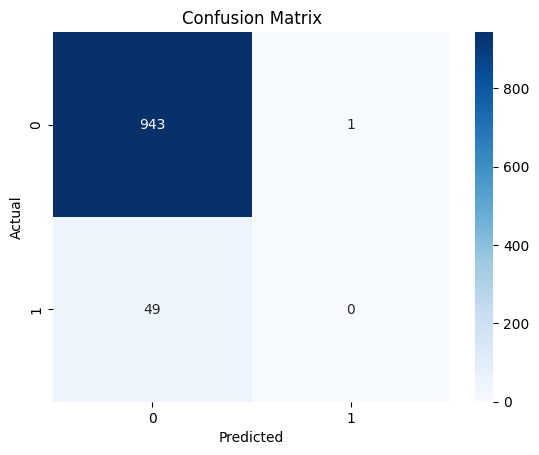

In [ ]:
# Plot Confusion Matrix
mean_cm = np.mean(confusion_matrices, axis=0).round().astype(int)
sns.heatmap(mean_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

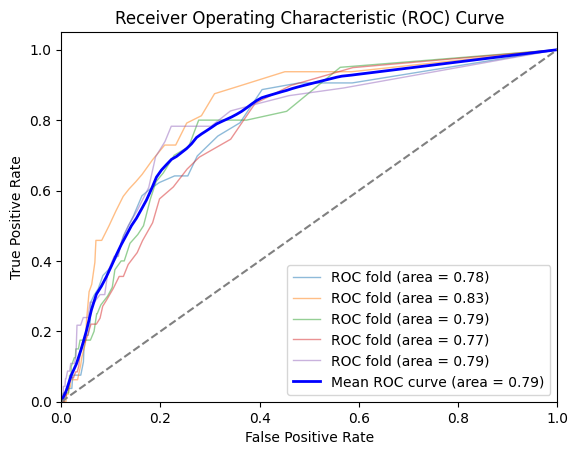

In [ ]:
# Plot ROC Curves
for fpr, tpr in roc_curves:
    plt.plot(fpr, tpr, lw=1, alpha=0.5, label=f'ROC fold (area = {auc(fpr, tpr):.2f})')

# Plot mean ROC curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)
for fpr, tpr in roc_curves:
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
mean_tpr /= len(roc_curves)
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label='Mean ROC curve (area = %0.2f)' % auc(mean_fpr, mean_tpr))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()